In [ ]:
# from sympy import symbols, solve
# #cálculo da faixa de valores de K
# K = symbols('K')
# c1, c2 = -0.926, 0.2051
# expr1 = c1 + K * c2 - 1
# expr2 = c1 + K * c2 + 1

# # Resolvendo para K em cada caso
# K1 = solve(expr1, K)
# K2 = solve(expr2, K)
# print(f"Intervalo de {K2} < K < {K1}")

C:\Users\Pedro\AppData\Local\Temp\ipykernel_19424\1014023107.py:31: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.step(t1, e1, 'b-', color='red', label='step de erro')


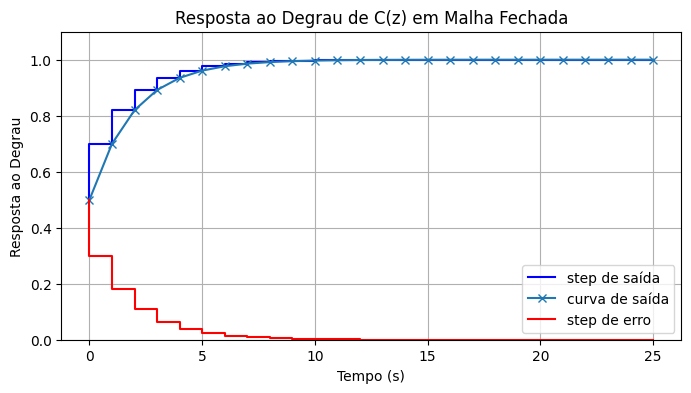

In [11]:

import control as ctl
import numpy as np
import matplotlib.pyplot as plt
#discretizando a planta
# simular degrau z/(z-1) ou seja 1
# Dz = 1 - Cz

T = 1
numT = [1, -0.1]
denT = [1, - 0.6]
Tz = ctl.TransferFunction(numT, denT, True) #

numG = [0.05, 0]
denG = [1, -0.9]
Gz = ctl.TransferFunction(numG, denG, True) # Planta

numD = [20*x for x in [1, -1.1, 0.18]]
denD = [1, -1, 0]
Dz = ctl.TransferFunction(numD, denD, True) # Controlador

Cz = Dz*Gz
Cz_mf = ctl.feedback(Cz, 1)
# Gerando a resposta ao degrau
t1, r1 = ctl.step_response(Cz_mf)
e1 = [1 - x for x in r1]

# Plotando a resposta ao degrau
plt.figure(figsize=(8, 4))
plt.step(t1, r1, 'b-', label='step de saída')
plt.plot(t1, r1, 'x-', label='curva de saída')
plt.step(t1, e1, 'b-', color='red', label='step de erro')
plt.title('Resposta ao Degrau de C(z) em Malha Fechada')
plt.xlabel('Tempo (s)')
plt.ylabel('Resposta ao Degrau')
plt.ylim(0, 1.1)
plt.grid(True)
plt.legend()
plt.show()

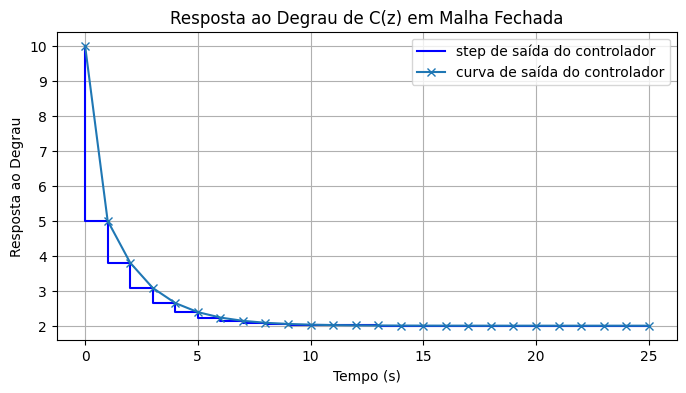

In [15]:
t2, r2 = ctl.forced_response(Dz, t1, e1)

# Plotando a resposta ao degrau
plt.figure(figsize=(8, 4))
plt.step(t2, r2, 'b-', label='step de saída do controlador')
plt.plot(t2, r2, 'x-', label='curva de saída do controlador')
plt.title('Resposta forçada de C(z) em Malha Fechada')
plt.xlabel('Tempo (s)')
plt.ylabel('Resposta forçada')
plt.grid(True)
plt.legend()
plt.show()

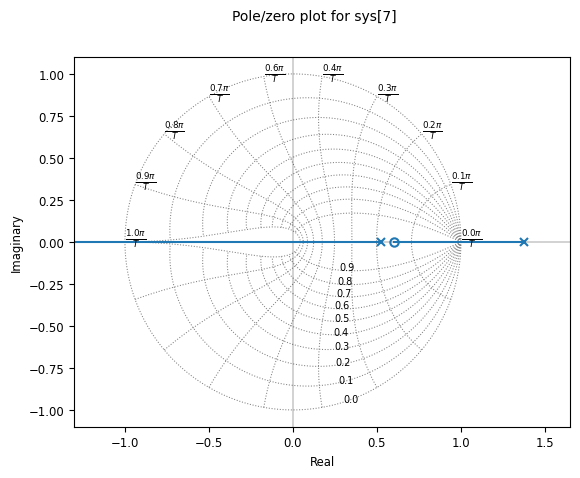

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import control as ctl

# Define the discrete transfer function
num = [1, -0.6]  # Numerator coefficients
den = [1, -1.9, 0.72]  # Denominator coefficients
system = ctl.TransferFunction(num, den, 1)  # The third parameter is the sampling time

# Calculate the root locus
plt.figure()
ctl.root_locus(system)
plt.show()

# Plot the root locus
# plt.figure()
# plt.plot(np.real(rlist), np.imag(rlist), 'b')
# plt.axhline(0, color='black', lw=0.5)
# plt.axvline(0, color='black', lw=0.5)
# plt.scatter(np.real(ctl.pole(system)), np.imag(ctl.pole(system)), color='red', marker='x', label='Polos')
# plt.scatter(np.real(ctl.zero(system)), np.imag(ctl.zero(system)), color='green', marker='o', label='Zeros')
# plt.title('Root Locus (Discrete System)')
# plt.xlabel('Real Axis')
# plt.ylabel('Imaginary Axis')
# plt.legend()
# plt.grid(True)
# plt.show()
